<a href="https://colab.research.google.com/github/yethegod/MLP_implementation/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
batch_size = 64
learning_rate = 0.01
num_epochs = 10

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST数据集的均值和标准差
])


In [ ]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:02<00:00, 3.43MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 159kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.65MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)  # 将图像展平为一维向量，大小为 28*28=784
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)  # 应用Dropout，防止过拟合
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)  # 最后一层没有激活函数，后续会直接用于交叉熵损失计算
        return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
def train(model, device, train_loader, optimizer, criterion, epoch):
    model.train()  # 设置模型为训练模式（启用 Dropout）
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()  # 清除上一步的梯度
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch}], Step [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}")
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch} Average Loss: {avg_loss:.4f}")
    return avg_loss  # 返回本轮训练的平均 loss


In [ ]:
def test(model, device, test_loader, criterion):
    model.eval()  # 设置模型为评估模式（关闭 Dropout）
    test_loss = 0.0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            test_loss += criterion(outputs, target).item()
            pred = outputs.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f"Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")
    return test_loss, accuracy


In [ ]:
train_losses = []
test_losses = []
test_accuracies = []

num_epochs = 10  # 或其他你设定的训练轮数


In [ ]:
for epoch in range(1, num_epochs + 1):
    train_loss = train(model, device, train_loader, optimizer, criterion, epoch)
    train_losses.append(train_loss)
    test_loss, accuracy = test(model, device, test_loader, criterion)
    test_losses.append(test_loss)
    test_accuracies.append(accuracy)


Epoch [1], Step [0/938], Loss: 2.3348
Epoch [1], Step [100/938], Loss: 0.7936
Epoch [1], Step [200/938], Loss: 0.6336
Epoch [1], Step [300/938], Loss: 1.1708
Epoch [1], Step [400/938], Loss: 0.6889
Epoch [1], Step [500/938], Loss: 0.7655
Epoch [1], Step [600/938], Loss: 0.5306
Epoch [1], Step [700/938], Loss: 0.4663
Epoch [1], Step [800/938], Loss: 0.8506
Epoch [1], Step [900/938], Loss: 0.7429
Epoch 1 Average Loss: 0.8454
Test Loss: 0.3964, Accuracy: 90.43%
Epoch [2], Step [0/938], Loss: 0.9141
Epoch [2], Step [100/938], Loss: 0.8292
Epoch [2], Step [200/938], Loss: 0.4644
Epoch [2], Step [300/938], Loss: 0.5900
Epoch [2], Step [400/938], Loss: 0.4436
Epoch [2], Step [500/938], Loss: 0.9622
Epoch [2], Step [600/938], Loss: 0.7330
Epoch [2], Step [700/938], Loss: 0.4897
Epoch [2], Step [800/938], Loss: 0.4750
Epoch [2], Step [900/938], Loss: 0.4394
Epoch 2 Average Loss: 0.7989
Test Loss: 0.3875, Accuracy: 91.28%
Epoch [3], Step [0/938], Loss: 0.6239
Epoch [3], Step [100/938], Loss: 0.6

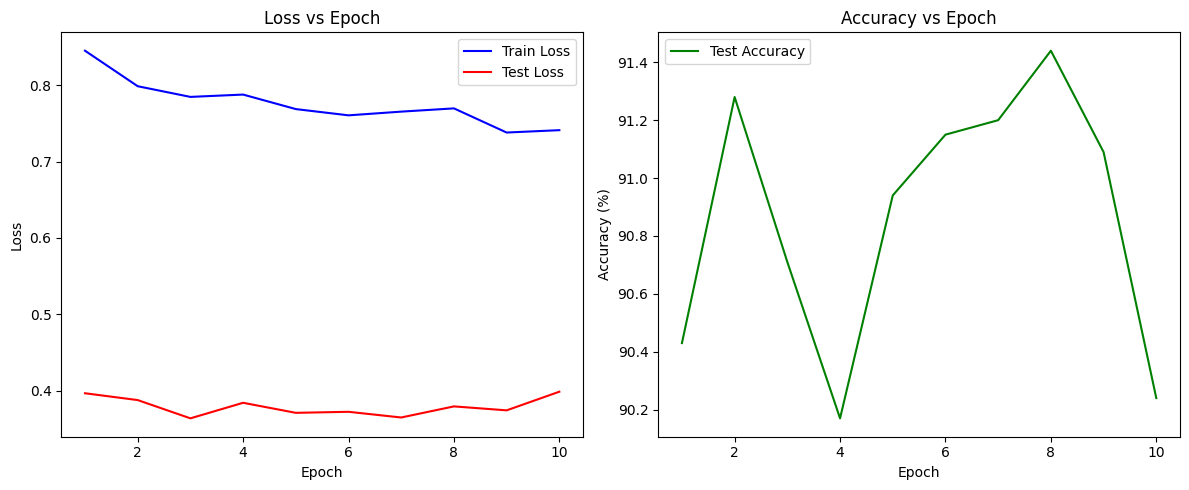

In [ ]:
# 绘制 Loss 和 Accuracy 图表
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12, 5))

# 绘制 Loss 图表
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b-', label='Train Loss')
plt.plot(epochs, test_losses, 'r-', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()

# 绘制 Accuracy 图表
plt.subplot(1, 2, 2)
plt.plot(epochs, test_accuracies, 'g-', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Epoch')
plt.legend()

plt.tight_layout()
plt.show()